**Data Visualization Project**


By: Sanika Katekar

In [ ]:
pip install squarify


In [ ]:
pip install circlify

In [ ]:
#import libraries
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import squarify 
import circlify
import seaborn as sns

**Dataset**

This dataset depicts the zika virus data collected for Brazil for the year 2016. It has 6 columns namely: No; State; Cases_under_investigation; Cases_confirmed; Cases_discarded; Cases_reported_total; 

Dataset reference: https://github.com/BuzzFeedNews/zika-data/blob/master/data/parsed/brazil/brazil-microcephaly-2016-01-23-table-1.csv


In [ ]:
#read_data
data = pd.read_csv("/content/zikavirus_brazil.csv")  
data.head()

,no,state,cases_under_investigation,cases_confirmed,cases_discarded,cases_reported_total
0,1,Alagoas,158,0,0,158
1,2,Bahia,471,35,27,533
2,3,Ceará,218,4,7,229
3,4,Maranhão,119,0,15,134
4,5,Paraíba,497,31,181,709


In [ ]:
#Data Cleaning 
#Changing string values ('Non Reported') in certain columns to 0
data['cases_under_investigation'] = pd.to_numeric(data['cases_under_investigation'], errors='coerce')
data = data.replace(np.nan, 0, regex=True)

data['cases_confirmed'] = pd.to_numeric(data['cases_confirmed'], errors='coerce')
data = data.replace(np.nan, 0, regex=True)

data['cases_discarded'] = pd.to_numeric(data['cases_discarded'], errors='coerce')
data = data.replace(np.nan, 0, regex=True)

data['cases_reported_total'] = pd.to_numeric(data['cases_reported_total'], errors='coerce')
data = data.replace(np.nan, 0, regex=True)

1. **Lolipop Chart**


This chart depicts the total number of cases reported in Brazil statewise. The states occupy the y-axis and the total number of reported cases are shown on the x-axis.

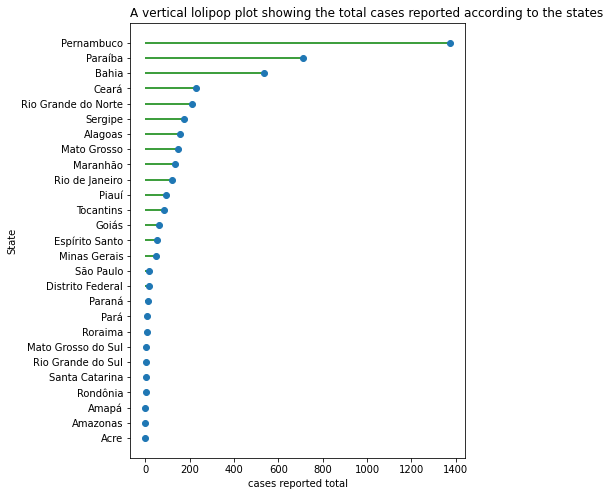

In [ ]:
#Lolipop Chart for cases_reported_total
#Reorder
#Use hline function

ordered_data = data.sort_values(by='cases_reported_total')
my_range=range(1,len(data.index)+1) 
fig, ax = plt.subplots(figsize=(6, 8))
ax.hlines(y=my_range, xmin=0, xmax=ordered_data['cases_reported_total'], color='green')
ax.plot(ordered_data['cases_reported_total'], my_range, "o")
plt.yticks(my_range, ordered_data['state'])
plt.title("A vertical lolipop plot showing the total cases reported according to the states", loc='left')
plt.xlabel('cases reported total')
plt.ylabel('State')


plt.show()

2. **Circular Barplot**

This is a circular barplot depicting the total number of cases of Zika virus under investigation. The plot has been plotted according to the increasing order of values.

Text(0.5, 1.05, 'Ordered data representing cases under investigation in Brazil')

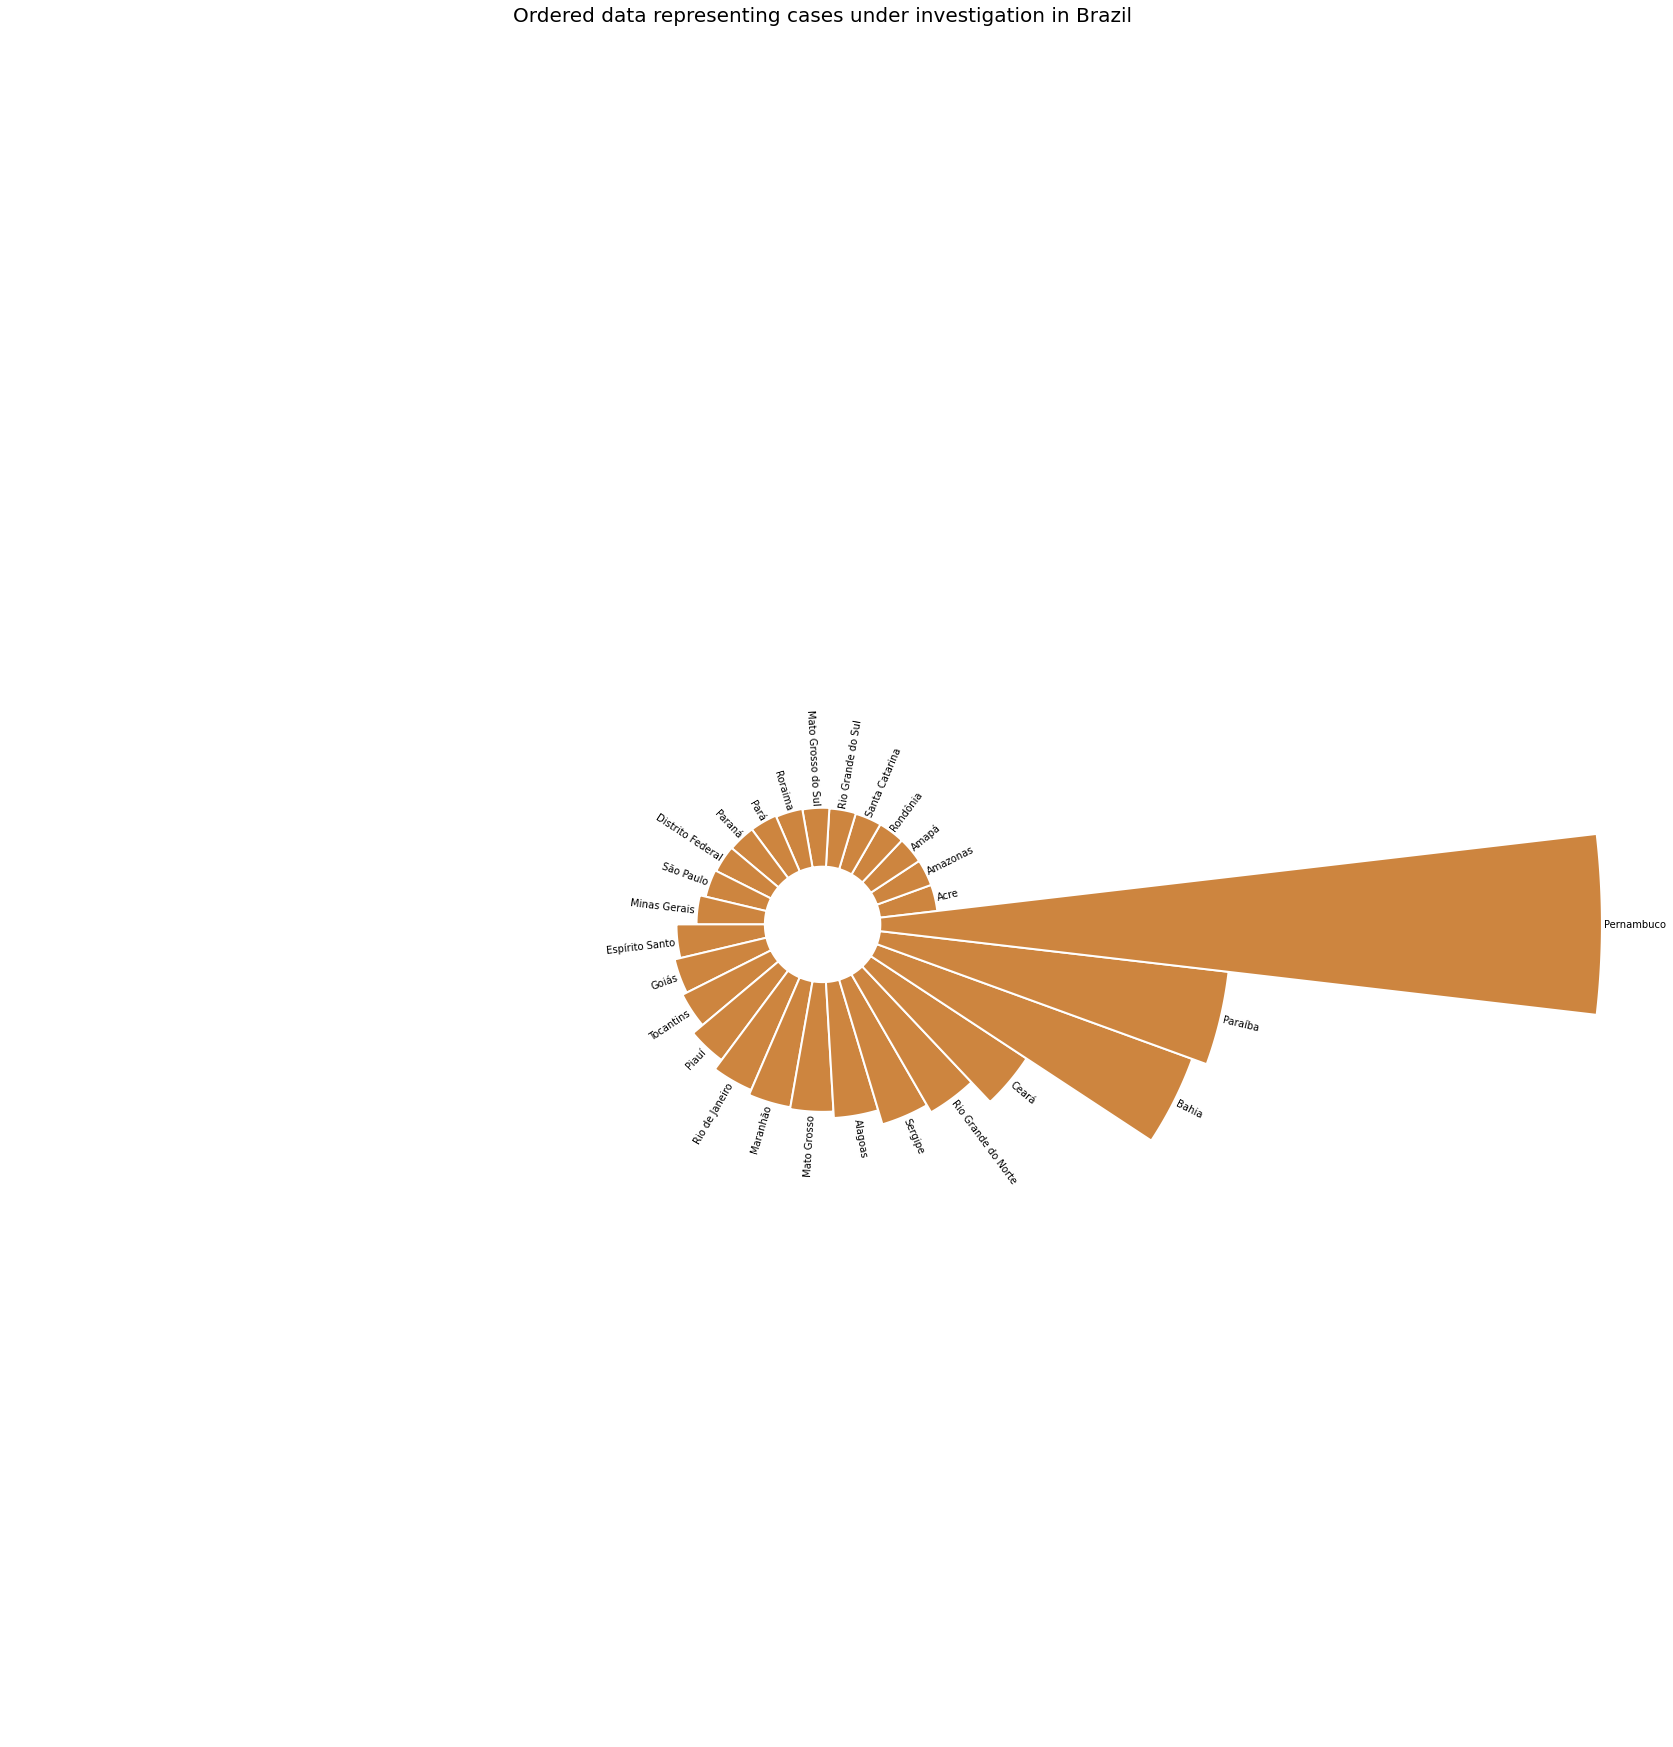

In [ ]:
#Ordering according to cases_under_investigation
ordereddata = data.sort_values(by='cases_under_investigation')

plt.figure(figsize=(50,30))
ax = plt.subplot(111, polar=True)
plt.axis('off')

upperLimit = 200
lowerLimit = 90
labelPadding = 4
max_val = ordereddata['cases_under_investigation'].max()
slope = (max_val - lowerLimit) / max_val
heights = slope * ordereddata['cases_under_investigation'] + lowerLimit
width = 2*np.pi / len(ordereddata.index)
indexes = list(range(1, len(ordereddata.index)+1))
angles = [element * width for element in indexes]

#For drawing bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="peru",
)

# For Adding labels: Flipping and rotation needed
for bar, angle, height, label in zip(bars,angles, heights, ordered_data["state"]):
    rotation = np.rad2deg(angle)
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 
    
ax.set_title('Ordered data representing cases under investigation in Brazil',fontsize=20)

3. **Circular Paking**

The following graph shows the statewise rate of discarding the cases. The graph shows that 'Santa catarina' has the highest number of discarded cases.

(-0.9855571918153518,
 0.9855571918153518,
 -0.9855571918153518,
 0.9855571918153518)

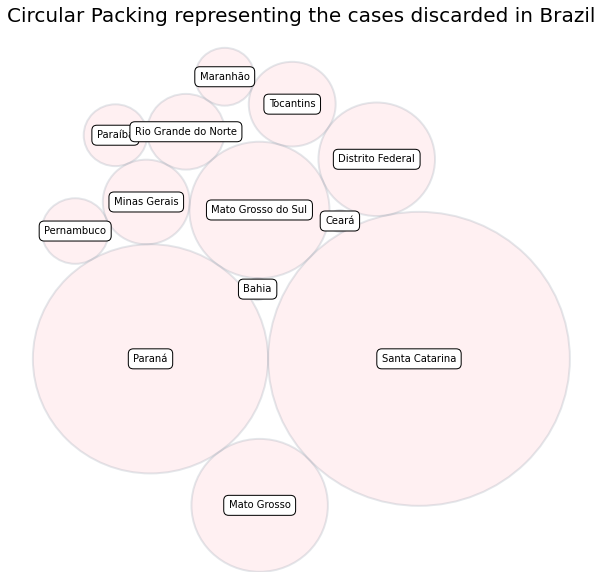

In [ ]:
#circulardata=data.drop(data.index[data['cases_confirmed'] == 0], inplace = True)
circulardata=data.drop(data.index[data['cases_discarded'] == 0])
circles = circlify.circlify(
    circulardata['cases_discarded'].tolist(), 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

fig, ax = plt.subplots(figsize=(10,10))
#for boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# list of labels
labels = circulardata['state']

# print circles
for circle, label in zip(circles, labels):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.2, linewidth=2,facecolor='lightpink',edgecolor='lightslategray'))
    plt.annotate(label, (x,y ) ,va='center', ha='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', pad=.5))
   
    

ax.set_title('Circular Packing representing the cases discarded in Brazil',fontsize=20)
ax.axis('off')

4. **Tree Plot**

The below graph gives us an idea about the percentage of confirmed cases in different states of Brazil as compared to each other.

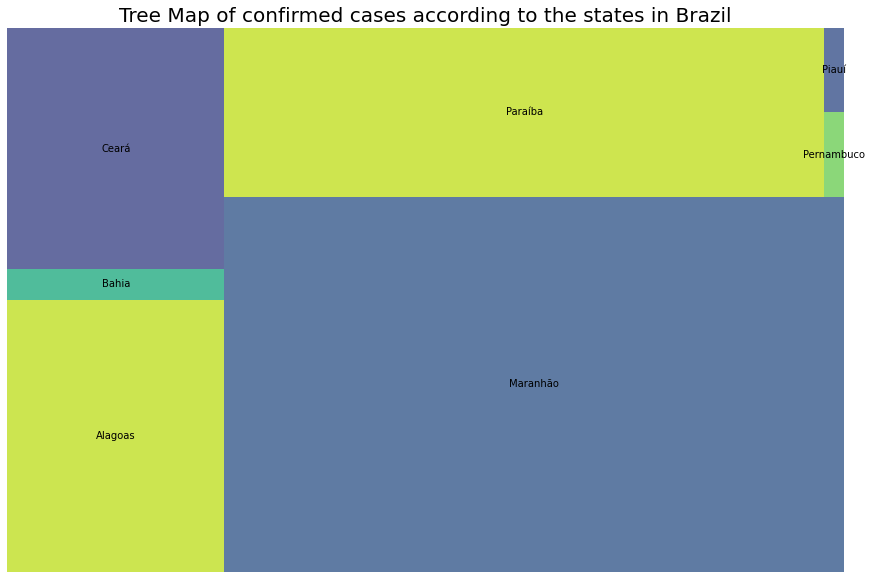

In [ ]:
# tree plot showing confirmed cases according to the states
plt.figure(figsize=(15,10))
treedata=data.drop(data.index[data['cases_confirmed'] == 0])
squarify.plot(sizes=treedata['cases_confirmed'], label=data['state'], alpha=.8 )
plt.axis('off')
plt.title("Tree Map of confirmed cases according to the states in Brazil",fontsize=20)
plt.show()

5. **Scatter Plot**

The following scatter plot shows us the relation between the cases undergoing investigation and cases confirmed out of those.

Text(0.5, 1.0, 'Scatter plot to show the relation between cases_under_investigation and cases_confirmed')

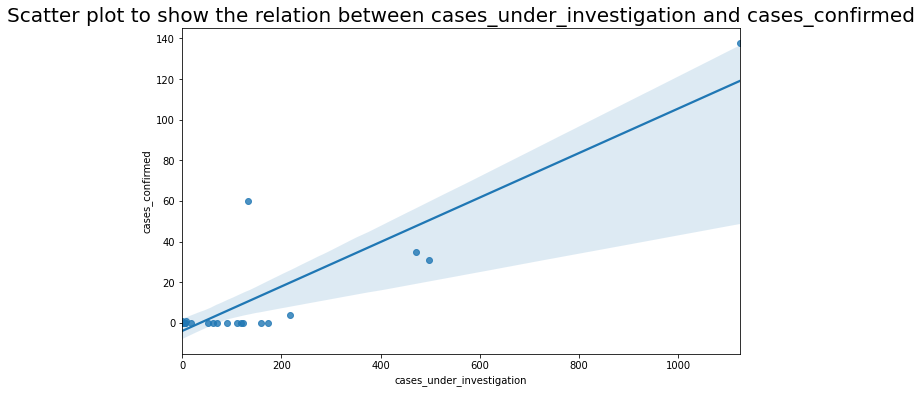

In [ ]:
#Creating a Scatter plot
plt.figure(figsize=(10,6))
sns.regplot(x=data["cases_under_investigation"], y=data["cases_confirmed"])
plt.title("Scatter plot to show the relation between cases_under_investigation and cases_confirmed",fontsize=20)